# Online Shoppers Purchasing Intension
利用不同的方法與模型來預測消費者網購的行為


### 可帶來的用途

**利用找出消費者的消費習慣與模式，能更加精準的投放廣告**

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
df=pd.read_csv('./online_shoppers_intention.csv')


In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


查看dataset的資料型態

In [4]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

將month 從英文簡寫轉為數字

In [5]:
month_map={'Feb':2,'Mar':3,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
df['Month']=df['Month'].map(month_map)
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,11,3,2,1,2,New_Visitor,True,False


將visitor type轉換型態

Returning_Vistor轉為1

New_Vistor轉為0

In [6]:
vistor_map={'Returning_Visitor':1,'New_Visitor':0}
df['VisitorType']=df['VisitorType'].map(vistor_map)
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1.0,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1.0,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1.0,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,1.0,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,11,3,2,1,2,0.0,True,False


In [7]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                float64
Weekend                       bool
Revenue                       bool
dtype: object

## Feature Analysis
* **"Administrative"**, **"Administrative Duration"**, **"Informational"**, **"Informational Duration"**, **"Product Related"** and **"Product Related Duration"** represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.  
  * 上面這幾項feature代表使用者在各類別點擊的次數以及停留的時間。
  
    
* The **"Bounce Rate"**, "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
  * **Bounce Rate**代表使用者在點進這個購物網站的其中一個頁面後馬上離開的比例，可以說明有可能是誤觸的比例。


* The value of **"Exit Rate"** feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 
  * **Exit Rate**代表此網站是最後被瀏覽的比例，ex:有五次上網都有經過網站A，但只有一次是瀏覽完網站A後便結束瀏覽器，這樣的**Exit Rate**是0.2
  
  
* The **"Page Value"** feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
  * **Page Value**代表使用者在進行線上購物前平均會瀏覽的網頁次數。
  
  
* The **"Special Day"** feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
  * **Special Day**代表是否接近節日的檔期，可能剛好網站有做促銷，造成買氣的增加或是購物的數量變動。
  
  
* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


* **Revenue**代表是否有成功交易，可用來作為classification的依據。

## 利用圖表觀察哪一項feature與購買的相關度最高



可以發現Page Values和Revenue有0.49的相關性是所有特徵中單項最高的


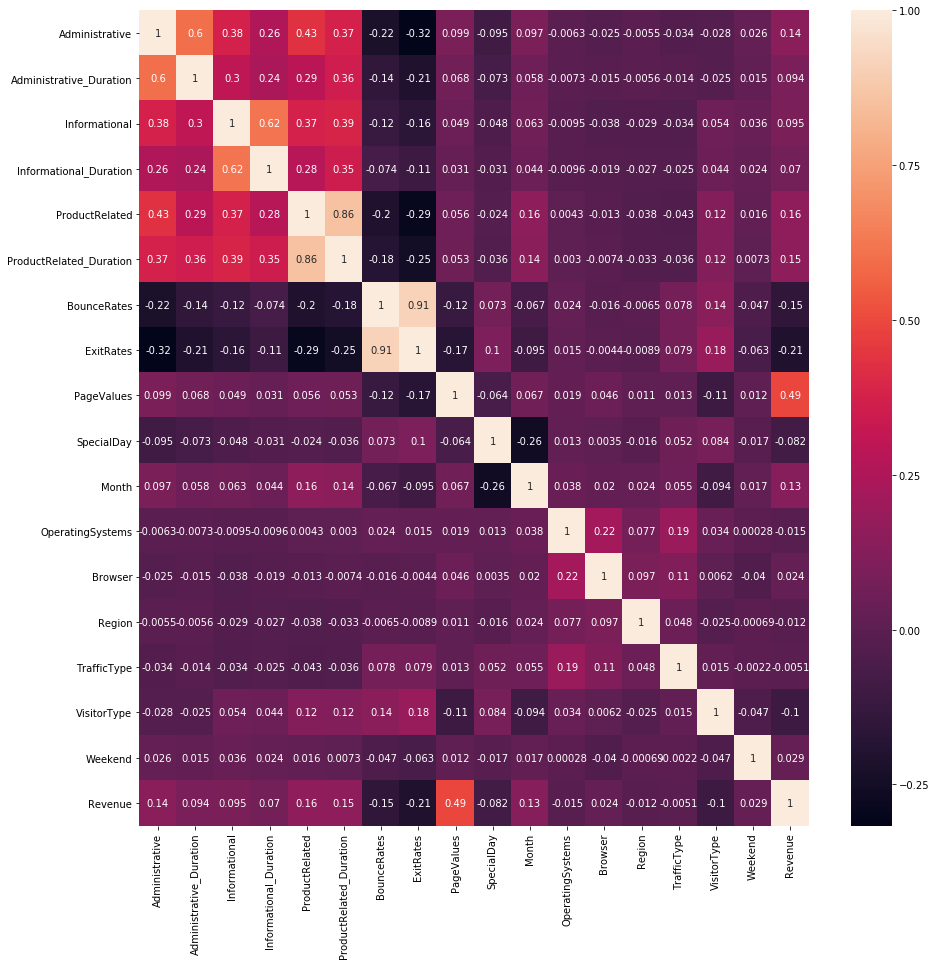

In [8]:
heatmap_in=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(heatmap_in,xticklabels=heatmap_in.columns,yticklabels=heatmap_in.columns,annot=True)

## 觀察哪個月的瀏覽數量是最多的並找出銷量最好的一個月


五月是這個購物網站瀏覽次數最多的一個月，二月則是最少的。

對於這個結果我猜是因為，五月可能大家都想買母親節禮物，而二月剛好是天數最少的一個月。

In [9]:
df['Month'].value_counts()

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64

但沒想到成交次數最多的竟然是11月，當月一共有760筆成功的交易。

In [10]:
df['Purchase Count']=pd.Series(np.ones(len(df)),index=df.index)
PurchaseCount=df.groupby(['Month','Revenue']).agg({'Purchase Count':'sum'})
PurchaseCount=PurchaseCount.sort_values(by=['Purchase Count'],ascending=False)
PurchaseCount

,,Purchase Count
Month,Revenue,
5,False,2999.0
11,False,2238.0
3,False,1715.0
12,False,1511.0
11,True,760.0
10,False,434.0
7,False,366.0
5,True,365.0
9,False,362.0


## 對於消費者的行為進行預測

###  1. 先藉由上述的兩個特徵來預測消費者的購物行為。

* 如果Page Values超過一定的數值便認定會購買
     * 簡易的二分法

In [11]:
df['Revenue']=df['Revenue'].astype(int)
mean=df['PageValues'].mean()

def split(row):
    if row['PageValues']>mean:
        val=1
    else:
        val=0
    return val

df['PageGuess']=df.apply(split,axis=1)
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Purchase Count,PageGuess
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,1.0,True,0,1.0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,1.0,True,0,1.0,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,1.0,True,0,1.0,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,1.0,False,0,1.0,0
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,11,3,2,1,2,0.0,True,0,1.0,0


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(df['Revenue'].values,df['PageGuess'].values)

0.8868613138686131

沒想到單純利用PageValues就能達到0.88的準確率，實在是蠻驚奇的。

原本想說如果能達到0.6就可喜可賀了

## Decision Tree
### 2. 利用decision tree預測消費者的購物行為

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Purchase Count,PageGuess
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1.0,False,0,1.0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1.0,False,0,1.0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1.0,False,0,1.0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1.0,False,0,1.0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1.0,True,0,1.0,0


In [14]:
#先去除一些多餘的cols
df=df.drop(['PageGuess','Purchase Count'],axis=1)

In [15]:
df['Weekend']=df['Weekend'].astype(int)
df=df.fillna(0)

train=df
test=train.sample(n=2000,replace=True).reset_index()
train=train.reset_index()
test.isnull().sum()

index                      0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [16]:
buy=train['Revenue'].values
train=train.drop(['Revenue'],axis=1)
dtree=DecisionTreeClassifier(max_depth=5)
dtree.fit(train,buy)

dot_data=StringIO()
export_graphviz(dtree,dot_data,filled=True,feature_names=list(train)
                ,class_names=['not gonna buy','will do']
                ,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('dtree_onlineshopping.pdf')

True

In [17]:
dtree.feature_importances_

array([0.02918008, 0.02890444, 0.00261475, 0.        , 0.        ,
       0.01663978, 0.01904332, 0.07321577, 0.00823919, 0.77695734,
       0.        , 0.04155214, 0.00112329, 0.        , 0.        ,
       0.        , 0.        , 0.0025299 ])

In [18]:
y_test=test['Revenue'].values
x_test=test.drop('Revenue',1)

y_predict=dtree.predict(x_test)

accuracy_score(y_test,y_predict)

0.905

利用decision tree做出來的結果準確率可達0.91

效果又更加地提升了，其中最重要的feature和之前猜測的一致，

PageValues的重要性有0.77

## Logistic Regression
### 3. 利用logistic regression分析消費者的購物行為

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
train=df
test=train.sample(n=2000,replace=True).reset_index()
train=train.reset_index()
train_y=train['Revenue']
train_x=train.drop('Revenue',1)
test_y=test['Revenue']
test_x=test.drop('Revenue',1)

準確率為0.87 比decision tree稍差一些

In [39]:
from sklearn.linear_model import LogisticRegression

logicmodel=LogisticRegression()
logic_result=logicmodel.fit(train_x,train_y)

logic_predict = logicmodel.predict(test_x)
print(accuracy_score(test_y,logic_predict))

0.878


### Model Adjustment

減少feature的數量，只用PageValues和ProductRelated，準確率與前一個結果相差無幾

In [42]:
logic_result_less= logicmodel.fit(df[['PageValues','ProductRelated']], train_y)
logic_predict_less = logicmodel.predict(test[['PageValues','ProductRelated']])
print(accuracy_score(test_y,logic_predict_less))

0.8785


只用ProductRelated和ProductRelatedDuration做預測，結果反而更差了，剩下0.84

In [38]:
logic_result_product= logicmodel.fit(df[['ProductRelated_Duration','ProductRelated']], train_y)
logic_predict_product = logicmodel.predict(test[['ProductRelated_Duration','ProductRelated']])
print(accuracy_score(test_y,logic_predict_product))

0.839


## Support Vector Machine

### 4. 利用support vector machine分析消費者的購物行為

利用svm模型，我已經可以達到0.99的準確率，幾乎是可以完全判斷出這份dataset裡消費者的消費行為了

In [55]:
from sklearn import svm
train_x=train_x.drop('index',1)
test_x=test_x.drop('index',1)

svm_model = svm.SVC()
svm_result= svm_model.fit(train_x, train_y)

svm_predict=svm_model.predict(test_x)
print(accuracy_score(test_y,svm_predict))

0.997


### Model Adjustment
試著減少feature數量，看是否還能達到這麼好的效果

只用兩個重要的特徵，準確率有下降，但仍能達到九成的準確率。

In [57]:
svm_model_less = svm.SVC(kernel='poly',C=3.0)
svm_result_less= svm_model.fit(df[['PageValues','ProductRelated']], train_y)

svm_predict_less = svm_model.predict(test[['PageValues','ProductRelated']])
print(accuracy_score(test_y, svm_predict_less))

0.932


## Neural Network

In [58]:
hidden_units = 40    # how many neurons in the hidden layer
activation = 'sigmoid'  # activation function for hidden layer
l2 = 0.4              # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 100          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update
class_weight = {     # define how each class weight
    0: 1.,
    1: 160 / 302
}

In [60]:
from keras import models, layers, optimizers, regularizers
model = models.Sequential()

model.add(layers.Dense(input_dim=train_x.shape[1],
                       units=40, 
                       activation='relu'))

model.add(layers.Dense(units=1,
                       activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()
history = model.fit(train_x, 
                    train_y, 
                    epochs=50, 
                    validation_data=(test_x, test_y),
                    verbose=False)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                720       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.


In [61]:
history=model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, class_weight=class_weight)
train_acc=model.evaluate(train_x, train_y, batch_size=batch_size)[1]
test_acc=model.evaluate(test_x, test_y, batch_size=batch_size)[1]


Epoch 1/100
12330/12330 [==============================] - 0s 35us/step - loss: 0.3399 - acc: 0.8796
Epoch 2/100
12330/12330 [==============================] - 0s 33us/step - loss: 0.3133 - acc: 0.8796
Epoch 3/100
12330/12330 [==============================] - 0s 33us/step - loss: 0.4086 - acc: 0.8762
Epoch 4/100
12330/12330 [==============================] - 0s 34us/step - loss: 0.4521 - acc: 0.8732
Epoch 5/100
12330/12330 [==============================] - 0s 35us/step - loss: 0.3666 - acc: 0.8783
Epoch 6/100
12330/12330 [==============================] - 1s 47us/step - loss: 0.4165 - acc: 0.8783
Epoch 7/100
12330/12330 [==============================] - 1s 41us/step - loss: 0.3906 - acc: 0.8803
Epoch 8/100
12330/12330 [==============================] - 0s 33us/step - loss: 0.3428 - acc: 0.8812
Epoch 9/100
12330/12330 [==============================] - 0s 33us/step - loss: 0.3732 - acc: 0.8783
Epoch 10/100
12330/12330 [==============================] - 1s 41us/step - loss: 0.3804 - a

12330/12330 [==============================] - 0s 36us/step - loss: 0.2514 - acc: 0.8799
Epoch 82/100
12330/12330 [==============================] - 0s 32us/step - loss: 0.2816 - acc: 0.8830
Epoch 83/100
12330/12330 [==============================] - 0s 33us/step - loss: 0.2455 - acc: 0.8801
Epoch 84/100
12330/12330 [==============================] - 0s 32us/step - loss: 0.2419 - acc: 0.8814
Epoch 85/100
12330/12330 [==============================] - 0s 32us/step - loss: 0.2642 - acc: 0.8817
Epoch 86/100
12330/12330 [==============================] - 0s 32us/step - loss: 0.2465 - acc: 0.8820
Epoch 87/100
12330/12330 [==============================] - 0s 32us/step - loss: 0.2370 - acc: 0.8848
Epoch 88/100
12330/12330 [==============================] - 0s 32us/step - loss: 0.2608 - acc: 0.8792
Epoch 89/100
12330/12330 [==============================] - 0s 32us/step - loss: 0.2723 - acc: 0.8827
Epoch 90/100
12330/12330 [==============================] - 0s 32us/step - loss: 0.2530 - acc: 

得出來的結果不是太好，只有0.88的準確率，接下來會試著修改模型

看能不能得到更好的準確率

Training accuracy: 0.887834549859009
Testing accuracy: 0.886


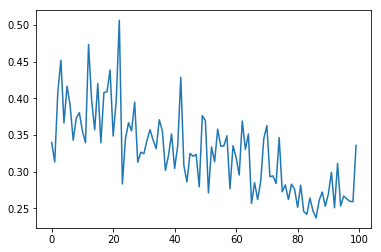

In [62]:
print("Training accuracy: %s" % train_acc)
print("Testing accuracy: %s" % test_acc)

losses=history.history['loss']
plt.plot(range(len(losses)), losses)
plt.show()

### Model Adjustment


In [63]:
hidden_units = 60    # how many neurons in the hidden layer
activation = 'sigmoid'  # activation function for hidden layer
l2 = 0.4              # regularization - how much we penalize large parameter values
learning_rate = 0.15  # how big our steps are in gradient descent
epochs = 80          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update
class_weight = {     # define how each class weight
    0: 1.,
    1: 160 / 302
}

In [64]:
models = models.Sequential()

models.add(layers.Dense(input_dim=train_x.shape[1],
                       units=40, 
                       activation='relu'))

models.add(layers.Dense(units=1,
                       activation='sigmoid'))

models.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()
history = models.fit(train_x, 
                    train_y, 
                    epochs=50, 
                    validation_data=(test_x, test_y),
                    verbose=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                720       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


In [65]:
history=models.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, class_weight=class_weight)
train_s_acc=models.evaluate(train_x, train_y, batch_size=batch_size)[1]
test_s_acc=models.evaluate(test_x, test_y, batch_size=batch_size)[1]


Epoch 1/80
12330/12330 [==============================] - 0s 36us/step - loss: 0.3167 - acc: 0.8798
Epoch 2/80
12330/12330 [==============================] - 0s 33us/step - loss: 0.3265 - acc: 0.8809
Epoch 3/80
12330/12330 [==============================] - 0s 34us/step - loss: 0.3747 - acc: 0.8773
Epoch 4/80
12330/12330 [==============================] - 0s 34us/step - loss: 0.8833 - acc: 0.8663
Epoch 5/80
12330/12330 [==============================] - 0s 34us/step - loss: 0.6701 - acc: 0.8810
Epoch 6/80
12330/12330 [==============================] - 0s 33us/step - loss: 0.5123 - acc: 0.8723
Epoch 7/80
12330/12330 [==============================] - 0s 34us/step - loss: 0.4783 - acc: 0.8753
Epoch 8/80
12330/12330 [==============================] - 0s 36us/step - loss: 0.9502 - acc: 0.8646
Epoch 9/80
12330/12330 [==============================] - 0s 34us/step - loss: 0.5237 - acc: 0.8796
Epoch 10/80
12330/12330 [==============================] - 1s 42us/step - loss: 0.5341 - acc: 0.8732

Modified Training accuracy: 0.8916463908971275
Modified Testing accuracy: 0.8945


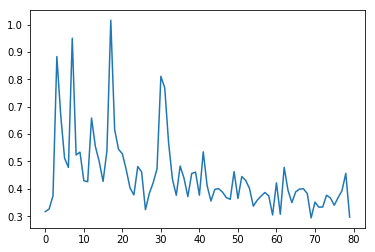

In [66]:
print("Modified Training accuracy: %s" % train_s_acc)
print("Modified Testing accuracy: %s" % test_s_acc)

losses=history.history['loss']
plt.plot(range(len(losses)), losses)
plt.show()

調整後的結果有好上一些，接近0.9的準確率，不過還是無法達到SVM接近1的準確度

## Comparision

這次總共使用了四種模型，包含Decision tree,Logistic regression,support vector machine以及Neural network

準確率從高至低依序為

1. SVM:0.99
2. Decision tree:0.91
3. Neural network:0.89
4. Logistic regression:0.88


## Conclusion

從分析中可得知最重要的特徵為PageValues，這個結果代表只要你在一個購物網站上**停留得夠久、瀏覽的商品夠多**，

就有愈高的機率**不小心手滑結帳**。

所以我認為如果要提高購物網站的營利，就要想辦法讓消費者點擊更多的頁面。

讓消費者對這個網站的黏著度提高，

例如設置一些**click bat**讓使用者不經意地點進去，

或是使用**dark pattern**的技巧，讓消費者在不注意的狀況下停留更長的時間。

另外在處理neural network的參數的時候，

我將**epoch的次數**以及**hidden unit的數量**增加之後，得到的準確率就有好上一些，

因此我認為如果能將投入training 的時間與資源都再增加的話，

應該能得到一個更好的成果與更接近svm的準確率。
